In [132]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

while error > tolerance:
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    for i in range(0, nrows - 1):
        for j in range(0, ncols - 1):
            # Top boundary beneath the dam
            if i == 0 and j > 201 and j < 241:
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
    
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4

            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4

    # Top left side of dam boundary assign head
    # if i == 0 and j < 202:
    h[0,:200] = lhead
                
            
    # Top right side of dam boundary assign head
    # elif i == 0 and j > 240:
    h[0, 241:]= rhead
    
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows -1), 0] = (h[nrows-2, 0] + h[(nrow-1), 1])/2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows -1), (ncols -1)]=(h[(nrows - 1), (ncols - 2)] + 
                               h[(nrows - 2), (ncols - 1)]) / 2
    
                
    error = (np.square(np.subtract(h, residual))).sum()
    print(step, error)

11831 54648.964077849705
11832 19438.22967409129
11833 10652.099131168454
11834 6913.250161817418
11835 4942.486446817628
11836 3758.8478170381395
11837 2983.4166586697393
11838 2443.055673587289
11839 2048.753035545202
11840 1750.5845202992368
11841 1518.613550628411
11842 1333.913248228806
11843 1183.9922001917403
11844 1060.3077984737472
11845 956.8403991007525
11846 869.2384236627928
11847 794.2859610269983
11848 729.5602038901078
11849 673.2046800310001
11850 623.7753451907865
11851 580.1337947074671
11852 541.3716953550595
11853 506.7563570544587
11854 475.69090087567423
11855 447.68468457683184
11856 422.3310530677876
11857 399.29039667156536
11858 378.27710741512055
11859 359.0494335187184
11860 341.40151335351266
11861 325.1570657242841
11862 310.1643512707463
11863 296.29211828520096
11864 283.4263174128699
11865 271.467421681601
11866 260.32822666081177
11867 249.9320341185586
11868 240.21114401748468
11869 231.10559596451097
11870 222.56211366178692
11871 214.53321547566762

KeyboardInterrupt: 

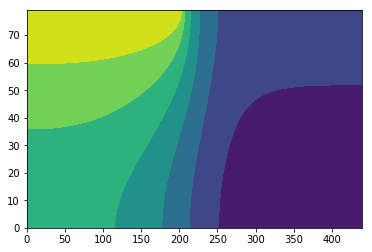

In [128]:
plt.contourf(np.flipud(h))